In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf

# 데이터 읽기

In [3]:
origin_df = pd.read_csv("data/basline_data.csv",index_col='Date',parse_dates=True)

In [4]:
origin_df.head()

,Open,High,Low,Close,Adj Close,Volume,next_price,next_rtn,log_return,CCI,...,middle,lb,MTM1,MTM3,ROC,WPR,S&P500,SOX,VIX,KOSPI
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,7068.327148,7109.184570,6913.069336,7027.469727,6893.216309,2256630,6813.062500,-0.005780,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1188.050049,410.359985,13.98,886.900024
2005-01-05,6913.069336,6978.440918,6815.011230,6945.754883,6813.062500,1773241,6853.140137,0.004728,-0.011696,NaN,...,NaN,NaN,-81.714844,NaN,NaN,NaN,1183.739990,404.250000,14.09,885.190002
2005-01-06,6978.440918,7305.299805,6847.697266,6986.612305,6853.140137,7480900,7085.585449,0.001171,0.005865,NaN,...,NaN,NaN,40.857422,NaN,NaN,NaN,1187.890015,402.140015,13.58,871.280029
2005-01-07,7043.812500,7231.756836,7019.298340,7223.585449,7085.585449,4612385,7253.907715,0.025522,0.033356,NaN,...,NaN,NaN,236.973145,196.115723,NaN,NaN,1186.189941,407.559998,13.49,870.840027
2005-01-10,7313.471680,7599.473145,7313.471680,7395.186035,7253.907715,4720077,7334.061523,0.011173,0.023478,NaN,...,NaN,NaN,171.600586,449.431152,NaN,NaN,1190.250000,406.250000,13.23,874.179993


In [5]:
origin_df['next_price'] = origin_df['Close'].shift(-10)

In [6]:
origin_df.shape

(4103, 27)

In [7]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4103 entries, 2005-01-04 to 2021-08-13
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        4103 non-null   float64
 1   High        4103 non-null   float64
 2   Low         4103 non-null   float64
 3   Close       4103 non-null   float64
 4   Adj Close   4103 non-null   float64
 5   Volume      4103 non-null   int64  
 6   next_price  4093 non-null   float64
 7   next_rtn    4103 non-null   float64
 8   log_return  4102 non-null   float64
 9   CCI         4090 non-null   float64
 10  MA5         4099 non-null   float64
 11  MA10        4094 non-null   float64
 12  RASD5       4095 non-null   float64
 13  RASD10      4090 non-null   float64
 14  MACD        4070 non-null   float64
 15  ATR         4089 non-null   float64
 16  ub          4084 non-null   float64
 17  middle      4084 non-null   float64
 18  lb          4084 non-null   float64
 19  MTM1     

* null 값 처리

In [8]:
origin_df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
next_price     10
next_rtn        0
log_return      1
CCI            13
MA5             4
MA10            9
RASD5           8
RASD10         13
MACD           33
ATR            14
ub             19
middle         19
lb             19
MTM1            1
MTM3            3
ROC            60
WPR            13
S&P500        124
SOX           125
VIX           125
KOSPI          20
dtype: int64

In [9]:
df = origin_df.dropna()

In [10]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
next_price    0
next_rtn      0
log_return    0
CCI           0
MA5           0
MA10          0
RASD5         0
RASD10        0
MACD          0
ATR           0
ub            0
middle        0
lb            0
MTM1          0
MTM3          0
ROC           0
WPR           0
S&P500        0
SOX           0
VIX           0
KOSPI         0
dtype: int64

* 라벨링

In [11]:
diffs = df['next_price']-df['Close']
df['label'] = np.where(diffs>0,1,0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:>

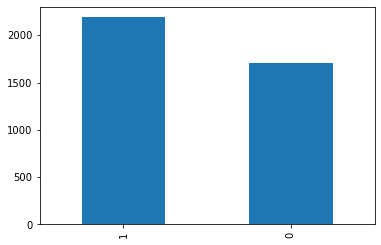

In [12]:
df['label'].value_counts().plot.bar()

# 전처리

In [13]:
X = df.drop(['next_price','label'], axis=1).values
y = df['label'].values

* minmax scaler

In [14]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [15]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [16]:
np.isinf(X).sum()

0

In [17]:
X = np.round(X,4)
y = np.round(y,4)

# trn,tst 구분

In [18]:
# seed 값 설정
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=seed)

# DNN 예측

## original model

In [21]:
original_model = Sequential()
original_model.add(Dense(20, input_dim=26, activation='relu'))
original_model.add(Dense(20, activation='relu'))
original_model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
original_model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# 모델을 실행합니다.
original_history = original_model.fit(X_train,Y_train, epochs=500, batch_size=20,
                    validation_data=(X_test, Y_test))

Epoch 1/500
146/146 [==============================] - 1s 4ms/step - loss: 0.6885 - accuracy: 0.5586 - val_loss: 0.6874 - val_accuracy: 0.5616
Epoch 2/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5630 - val_loss: 0.6869 - val_accuracy: 0.5595
Epoch 3/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5623 - val_loss: 0.6881 - val_accuracy: 0.5339
Epoch 4/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5582 - val_loss: 0.6860 - val_accuracy: 0.5595
Epoch 5/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5606 - val_loss: 0.6860 - val_accuracy: 0.5575
Epoch 6/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5781 - val_loss: 0.6868 - val_accuracy: 0.5554
Epoch 7/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5678 - val_loss: 0.6872 - val_accuracy: 0.5647

Epoch 58/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6212 - val_loss: 0.6758 - val_accuracy: 0.5637
Epoch 59/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.6168 - val_loss: 0.6760 - val_accuracy: 0.5554
Epoch 60/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.6236 - val_loss: 0.6752 - val_accuracy: 0.5647
Epoch 61/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6182 - val_loss: 0.6756 - val_accuracy: 0.5678
Epoch 62/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6267 - val_loss: 0.6753 - val_accuracy: 0.5708
Epoch 63/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6168 - val_loss: 0.6772 - val_accuracy: 0.5544
Epoch 64/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6205 - val_loss: 0.6768 - val_accuracy:

146/146 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.6483 - val_loss: 0.6604 - val_accuracy: 0.6016
Epoch 115/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.6517 - val_loss: 0.6637 - val_accuracy: 0.5924
Epoch 116/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.6524 - val_loss: 0.6704 - val_accuracy: 0.5924
Epoch 117/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.6545 - val_loss: 0.6621 - val_accuracy: 0.5893
Epoch 118/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.6521 - val_loss: 0.6610 - val_accuracy: 0.6109
Epoch 119/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6586 - val_loss: 0.6607 - val_accuracy: 0.6129
Epoch 120/500
146/146 [==============================] - 1s 3ms/step - loss: 0.6213 - accuracy: 0.6476 - val_loss: 0.6647 - val_accuracy: 0.5965

146/146 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.6726 - val_loss: 0.6517 - val_accuracy: 0.6191
Epoch 171/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.6654 - val_loss: 0.6504 - val_accuracy: 0.6181
Epoch 172/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.6671 - val_loss: 0.6527 - val_accuracy: 0.6191
Epoch 173/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.6658 - val_loss: 0.6561 - val_accuracy: 0.6006
Epoch 174/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.6695 - val_loss: 0.6540 - val_accuracy: 0.6170
Epoch 175/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.6644 - val_loss: 0.6503 - val_accuracy: 0.6181
Epoch 176/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.6637 - val_loss: 0.6517 - val_accuracy: 0.6088

146/146 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.6863 - val_loss: 0.6486 - val_accuracy: 0.6376
Epoch 227/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.6890 - val_loss: 0.6501 - val_accuracy: 0.6211
Epoch 228/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5824 - accuracy: 0.6812 - val_loss: 0.6480 - val_accuracy: 0.6304
Epoch 229/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5793 - accuracy: 0.6911 - val_loss: 0.6533 - val_accuracy: 0.6119
Epoch 230/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.6921 - val_loss: 0.6585 - val_accuracy: 0.6016
Epoch 231/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.6866 - val_loss: 0.6536 - val_accuracy: 0.6273
Epoch 232/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.6897 - val_loss: 0.6755 - val_accuracy: 0.5924

146/146 [==============================] - 1s 4ms/step - loss: 0.5655 - accuracy: 0.7003 - val_loss: 0.6382 - val_accuracy: 0.6345
Epoch 283/500
146/146 [==============================] - 1s 4ms/step - loss: 0.5648 - accuracy: 0.6986 - val_loss: 0.6495 - val_accuracy: 0.6150
Epoch 284/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.6942 - val_loss: 0.6425 - val_accuracy: 0.6263
Epoch 285/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.6884 - val_loss: 0.6429 - val_accuracy: 0.6396
Epoch 286/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7007 - val_loss: 0.6442 - val_accuracy: 0.6314
Epoch 287/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7007 - val_loss: 0.6428 - val_accuracy: 0.6366
Epoch 288/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.7010 - val_loss: 0.6376 - val_accuracy: 0.6324

146/146 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7137 - val_loss: 0.6365 - val_accuracy: 0.6386
Epoch 339/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7051 - val_loss: 0.6480 - val_accuracy: 0.6027
Epoch 340/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7110 - val_loss: 0.6477 - val_accuracy: 0.6222
Epoch 341/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.7068 - val_loss: 0.6402 - val_accuracy: 0.6304
Epoch 342/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7062 - val_loss: 0.6472 - val_accuracy: 0.6427
Epoch 343/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.7092 - val_loss: 0.6348 - val_accuracy: 0.6335
Epoch 344/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7099 - val_loss: 0.6427 - val_accuracy: 0.6211

146/146 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7209 - val_loss: 0.6443 - val_accuracy: 0.6304
Epoch 395/500
146/146 [==============================] - 1s 4ms/step - loss: 0.5402 - accuracy: 0.7134 - val_loss: 0.6426 - val_accuracy: 0.6345
Epoch 396/500
146/146 [==============================] - 1s 4ms/step - loss: 0.5448 - accuracy: 0.7164 - val_loss: 0.6438 - val_accuracy: 0.6448
Epoch 397/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7058 - val_loss: 0.6451 - val_accuracy: 0.6407
Epoch 398/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7158 - val_loss: 0.6579 - val_accuracy: 0.6437
Epoch 399/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7185 - val_loss: 0.6483 - val_accuracy: 0.6324
Epoch 400/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7113 - val_loss: 0.6382 - val_accuracy: 0.6396

146/146 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7178 - val_loss: 0.6412 - val_accuracy: 0.6509
Epoch 451/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7229 - val_loss: 0.6466 - val_accuracy: 0.6417
Epoch 452/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7274 - val_loss: 0.6654 - val_accuracy: 0.6191
Epoch 453/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7267 - val_loss: 0.6411 - val_accuracy: 0.6355
Epoch 454/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7205 - val_loss: 0.6440 - val_accuracy: 0.6232
Epoch 455/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7175 - val_loss: 0.6389 - val_accuracy: 0.6242
Epoch 456/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7202 - val_loss: 0.6381 - val_accuracy: 0.6314

## middle modeel

In [22]:
smaller_model = Sequential()
smaller_model.add(Dense(20, input_dim=26, activation='relu'))
smaller_model.add(Dense(20, activation='relu'))
smaller_model.add(Dense(20, activation='relu'))
smaller_model.add(Dense(20, activation='relu'))
smaller_model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
smaller_model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# 모델을 실행합니다.
smaller_history = smaller_model.fit(X_train,Y_train, epochs=500, batch_size=20,
                    validation_data=(X_test, Y_test))

Epoch 1/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5623 - val_loss: 0.6838 - val_accuracy: 0.5616
Epoch 2/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5623 - val_loss: 0.6831 - val_accuracy: 0.5616
Epoch 3/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5719 - val_loss: 0.6832 - val_accuracy: 0.5554
Epoch 4/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5692 - val_loss: 0.6812 - val_accuracy: 0.5493
Epoch 5/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5613 - val_loss: 0.6813 - val_accuracy: 0.5647
Epoch 6/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5678 - val_loss: 0.6803 - val_accuracy: 0.5493
Epoch 7/500
146/146 [==============================] - 1s 4ms/step - loss: 0.6702 - accuracy: 0.5692 - val_loss: 0.6823 - val_accuracy: 0.5565

Epoch 58/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.6644 - val_loss: 0.6579 - val_accuracy: 0.6078
Epoch 59/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.6699 - val_loss: 0.6593 - val_accuracy: 0.6181
Epoch 60/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.6688 - val_loss: 0.6505 - val_accuracy: 0.6140
Epoch 61/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.6743 - val_loss: 0.6682 - val_accuracy: 0.5883
Epoch 62/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.6774 - val_loss: 0.6547 - val_accuracy: 0.6027
Epoch 63/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.6699 - val_loss: 0.6608 - val_accuracy: 0.6027
Epoch 64/500
146/146 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.6753 - val_loss: 0.6526 - val_accuracy:

Epoch 115/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7079 - val_loss: 0.6372 - val_accuracy: 0.6232
Epoch 116/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.7158 - val_loss: 0.6800 - val_accuracy: 0.6232
Epoch 117/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7144 - val_loss: 0.6511 - val_accuracy: 0.6253
Epoch 118/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.7116 - val_loss: 0.6413 - val_accuracy: 0.6448
Epoch 119/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7086 - val_loss: 0.6388 - val_accuracy: 0.6417
Epoch 120/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7175 - val_loss: 0.6351 - val_accuracy: 0.6581
Epoch 121/500
146/146 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7096 - val_loss: 0.6395 - val_ac

146/146 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7503 - val_loss: 0.6279 - val_accuracy: 0.6602
Epoch 172/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7397 - val_loss: 0.6553 - val_accuracy: 0.6643
Epoch 173/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7503 - val_loss: 0.6621 - val_accuracy: 0.6458
Epoch 174/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7466 - val_loss: 0.6476 - val_accuracy: 0.6581
Epoch 175/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7476 - val_loss: 0.6476 - val_accuracy: 0.6674
Epoch 176/500
146/146 [==============================] - 1s 5ms/step - loss: 0.4932 - accuracy: 0.7534 - val_loss: 0.6589 - val_accuracy: 0.6704
Epoch 177/500
146/146 [==============================] - 1s 3ms/step - loss: 0.5016 - accuracy: 0.7452 - val_loss: 0.6474 - val_accuracy: 0.6561

146/146 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7623 - val_loss: 0.6432 - val_accuracy: 0.6581
Epoch 228/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7675 - val_loss: 0.6465 - val_accuracy: 0.6612
Epoch 229/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7692 - val_loss: 0.6616 - val_accuracy: 0.6602
Epoch 230/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7658 - val_loss: 0.6607 - val_accuracy: 0.6581
Epoch 231/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7671 - val_loss: 0.6535 - val_accuracy: 0.6632
Epoch 232/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7678 - val_loss: 0.6704 - val_accuracy: 0.6530
Epoch 233/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.7623 - val_loss: 0.6269 - val_accuracy: 0.6838

146/146 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.7884 - val_loss: 0.6541 - val_accuracy: 0.6766
Epoch 284/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.7849 - val_loss: 0.6747 - val_accuracy: 0.6797
Epoch 285/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.7829 - val_loss: 0.7275 - val_accuracy: 0.6417
Epoch 286/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.7877 - val_loss: 0.6880 - val_accuracy: 0.6715
Epoch 287/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4448 - accuracy: 0.7791 - val_loss: 0.6840 - val_accuracy: 0.6930
Epoch 288/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7839 - val_loss: 0.6430 - val_accuracy: 0.6776
Epoch 289/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.7866 - val_loss: 0.6722 - val_accuracy: 0.6910

146/146 [==============================] - 1s 4ms/step - loss: 0.4154 - accuracy: 0.7966 - val_loss: 0.7053 - val_accuracy: 0.6663
Epoch 340/500
146/146 [==============================] - 1s 4ms/step - loss: 0.4152 - accuracy: 0.8000 - val_loss: 0.6596 - val_accuracy: 0.6920
Epoch 341/500
146/146 [==============================] - 1s 4ms/step - loss: 0.4136 - accuracy: 0.7949 - val_loss: 0.6720 - val_accuracy: 0.6735
Epoch 342/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.7983 - val_loss: 0.6883 - val_accuracy: 0.6766
Epoch 343/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.7911 - val_loss: 0.6730 - val_accuracy: 0.6735
Epoch 344/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.7990 - val_loss: 0.7044 - val_accuracy: 0.6653
Epoch 345/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.7955 - val_loss: 0.6387 - val_accuracy: 0.6961

146/146 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8086 - val_loss: 0.7227 - val_accuracy: 0.6817
Epoch 396/500
146/146 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8017 - val_loss: 0.7139 - val_accuracy: 0.6920
Epoch 397/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8000 - val_loss: 0.7048 - val_accuracy: 0.6910
Epoch 398/500
146/146 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8092 - val_loss: 0.6807 - val_accuracy: 0.6848
Epoch 399/500
146/146 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8038 - val_loss: 0.7044 - val_accuracy: 0.6797
Epoch 400/500
146/146 [==============================] - 1s 4ms/step - loss: 0.3896 - accuracy: 0.8116 - val_loss: 0.6903 - val_accuracy: 0.6776
Epoch 401/500
146/146 [==============================] - 0s 3ms/step - loss: 0.3943 - accuracy: 0.8068 - val_loss: 0.6783 - val_accuracy: 0.6838

146/146 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8233 - val_loss: 0.6993 - val_accuracy: 0.6992
Epoch 452/500
146/146 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8216 - val_loss: 0.7154 - val_accuracy: 0.6776
Epoch 453/500
146/146 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8277 - val_loss: 0.7155 - val_accuracy: 0.6786
Epoch 454/500
146/146 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8161 - val_loss: 0.7109 - val_accuracy: 0.6930
Epoch 455/500
146/146 [==============================] - ETA: 0s - loss: 0.3767 - accuracy: 0.82 - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8271 - val_loss: 0.7186 - val_accuracy: 0.6961
Epoch 456/500
146/146 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8192 - val_loss: 0.7142 - val_accuracy: 0.6961
Epoch 457/500
146/146 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8233

## bigger model

In [23]:
bigger_model = Sequential()
bigger_model.add(Dense(20, input_dim=26, activation='relu'))
bigger_model.add(Dense(20, activation='relu'))
bigger_model.add(Dense(20, activation='relu'))
bigger_model.add(Dense(20, activation='relu'))
bigger_model.add(Dense(20, activation='relu'))
bigger_model.add(Dense(20, activation='relu'))
bigger_model.add(Dense(20, activation='relu'))
bigger_model.add(Dense(20, activation='relu'))
bigger_model.add(Dense(20, activation='relu'))
bigger_model.add(Dense(20, activation='relu'))
bigger_model.add(Dense(20, activation='relu'))
bigger_model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
bigger_model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# 모델을 실행합니다.
bigger_history = bigger_model.fit(X_train,Y_train, epochs=500, batch_size=20,
                    validation_data=(X_test, Y_test))

Epoch 1/500
146/146 [==============================] - 1s 5ms/step - loss: 0.6872 - accuracy: 0.5596 - val_loss: 0.6856 - val_accuracy: 0.5616
Epoch 2/500
146/146 [==============================] - 1s 5ms/step - loss: 0.6855 - accuracy: 0.5623 - val_loss: 0.6851 - val_accuracy: 0.5616
Epoch 3/500
146/146 [==============================] - 1s 4ms/step - loss: 0.6824 - accuracy: 0.5623 - val_loss: 0.6836 - val_accuracy: 0.5616
Epoch 4/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5623 - val_loss: 0.6811 - val_accuracy: 0.5616
Epoch 5/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5623 - val_loss: 0.6808 - val_accuracy: 0.5616
Epoch 6/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5623 - val_loss: 0.6800 - val_accuracy: 0.5616
Epoch 7/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5623 - val_loss: 0.6820 - val_accuracy: 0.5616

146/146 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.5795 - val_loss: 0.6785 - val_accuracy: 0.5513
Epoch 58/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.5969 - val_loss: 0.6655 - val_accuracy: 0.5431
Epoch 59/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.5777 - val_loss: 0.6771 - val_accuracy: 0.5554
Epoch 60/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.5863 - val_loss: 0.6771 - val_accuracy: 0.5616
Epoch 61/500
146/146 [==============================] - 1s 4ms/step - loss: 0.6453 - accuracy: 0.5897 - val_loss: 0.6615 - val_accuracy: 0.5575
Epoch 62/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.5836 - val_loss: 0.6594 - val_accuracy: 0.5595
Epoch 63/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6449 - accuracy: 0.5853 - val_loss: 0.6614 - val_accuracy: 0.5554
Epoch

Epoch 114/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.6110 - val_loss: 0.6517 - val_accuracy: 0.5760
Epoch 115/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.6175 - val_loss: 0.6639 - val_accuracy: 0.5719
Epoch 116/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6179 - accuracy: 0.6195 - val_loss: 0.6559 - val_accuracy: 0.5657
Epoch 117/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.6144 - val_loss: 0.6678 - val_accuracy: 0.5739
Epoch 118/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.6195 - val_loss: 0.6777 - val_accuracy: 0.5513
Epoch 119/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.6072 - val_loss: 0.6533 - val_accuracy: 0.5760
Epoch 120/500
146/146 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.6188 - val_loss: 0.6559 - val_ac

146/146 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.6932 - val_loss: 0.6402 - val_accuracy: 0.6417
Epoch 171/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.6921 - val_loss: 0.6482 - val_accuracy: 0.6222
Epoch 172/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.6966 - val_loss: 0.6527 - val_accuracy: 0.6304
Epoch 173/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5684 - accuracy: 0.6945 - val_loss: 0.6593 - val_accuracy: 0.6253
Epoch 174/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.6908 - val_loss: 0.6623 - val_accuracy: 0.6263
Epoch 175/500
146/146 [==============================] - 1s 4ms/step - loss: 0.5627 - accuracy: 0.7010 - val_loss: 0.6332 - val_accuracy: 0.6448
Epoch 176/500
146/146 [==============================] - 1s 5ms/step - loss: 0.5699 - accuracy: 0.6890 - val_loss: 0.6252 - val_accuracy: 0.6468

146/146 [==============================] - 1s 4ms/step - loss: 0.5232 - accuracy: 0.7247 - val_loss: 0.6561 - val_accuracy: 0.6591
Epoch 227/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5218 - accuracy: 0.7332 - val_loss: 0.6680 - val_accuracy: 0.6612
Epoch 228/500
146/146 [==============================] - 1s 4ms/step - loss: 0.5175 - accuracy: 0.7277 - val_loss: 0.6588 - val_accuracy: 0.6468
Epoch 229/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5263 - accuracy: 0.7277 - val_loss: 0.6668 - val_accuracy: 0.6273
Epoch 230/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7301 - val_loss: 0.6547 - val_accuracy: 0.6427
Epoch 231/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7274 - val_loss: 0.6576 - val_accuracy: 0.6550
Epoch 232/500
146/146 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7257 - val_loss: 0.6477 - val_accuracy: 0.6561

146/146 [==============================] - 0s 3ms/step - loss: 0.4662 - accuracy: 0.7613 - val_loss: 0.6811 - val_accuracy: 0.6622
Epoch 283/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7414 - val_loss: 0.6760 - val_accuracy: 0.6653
Epoch 284/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7318 - val_loss: 0.6487 - val_accuracy: 0.6561
Epoch 285/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.7466 - val_loss: 0.6587 - val_accuracy: 0.6571
Epoch 286/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7551 - val_loss: 0.6567 - val_accuracy: 0.6478
Epoch 287/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4855 - accuracy: 0.7397 - val_loss: 0.7021 - val_accuracy: 0.6345
Epoch 288/500
146/146 [==============================] - 1s 4ms/step - loss: 0.4793 - accuracy: 0.7479 - val_loss: 0.6624 - val_accuracy: 0.6509

146/146 [==============================] - 1s 4ms/step - loss: 0.4366 - accuracy: 0.7719 - val_loss: 0.6578 - val_accuracy: 0.6858
Epoch 339/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.7565 - val_loss: 0.6869 - val_accuracy: 0.6797
Epoch 340/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.7579 - val_loss: 0.6918 - val_accuracy: 0.6581
Epoch 341/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.7613 - val_loss: 0.6580 - val_accuracy: 0.6786
Epoch 342/500
146/146 [==============================] - 1s 4ms/step - loss: 0.4602 - accuracy: 0.7599 - val_loss: 0.7366 - val_accuracy: 0.6324
Epoch 343/500
146/146 [==============================] - 1s 5ms/step - loss: 0.4436 - accuracy: 0.7610 - val_loss: 0.7151 - val_accuracy: 0.6612
Epoch 344/500
146/146 [==============================] - 1s 4ms/step - loss: 0.4611 - accuracy: 0.7623 - val_loss: 0.6836 - val_accuracy: 0.6735

146/146 [==============================] - 1s 5ms/step - loss: 0.4189 - accuracy: 0.7801 - val_loss: 0.8174 - val_accuracy: 0.6776
Epoch 395/500
146/146 [==============================] - 1s 7ms/step - loss: 0.4253 - accuracy: 0.7709 - val_loss: 0.7030 - val_accuracy: 0.6643
Epoch 396/500
146/146 [==============================] - 1s 4ms/step - loss: 0.4267 - accuracy: 0.7767 - val_loss: 0.7561 - val_accuracy: 0.6632
Epoch 397/500
146/146 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.7788 - val_loss: 0.7532 - val_accuracy: 0.6704
Epoch 398/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.7712 - val_loss: 0.6611 - val_accuracy: 0.6879
Epoch 399/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.7599 - val_loss: 0.6763 - val_accuracy: 0.6704
Epoch 400/500
146/146 [==============================] - 1s 4ms/step - loss: 0.4249 - accuracy: 0.7836 - val_loss: 0.7313 - val_accuracy: 0.6540

146/146 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.7979 - val_loss: 0.7051 - val_accuracy: 0.6817
Epoch 451/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.7757 - val_loss: 0.6744 - val_accuracy: 0.6848
Epoch 452/500
146/146 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.7709 - val_loss: 0.7095 - val_accuracy: 0.6704
Epoch 453/500
146/146 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.7822 - val_loss: 0.7212 - val_accuracy: 0.6612
Epoch 454/500
146/146 [==============================] - 1s 5ms/step - loss: 0.4075 - accuracy: 0.7825 - val_loss: 0.7062 - val_accuracy: 0.6694
Epoch 455/500
146/146 [==============================] - 1s 4ms/step - loss: 0.4026 - accuracy: 0.7904 - val_loss: 0.7102 - val_accuracy: 0.6838
Epoch 456/500
146/146 [==============================] - 1s 4ms/step - loss: 0.4144 - accuracy: 0.7692 - val_loss: 0.6852 - val_accuracy: 0.6951

# 모델 비교

## train loss

In [44]:
original_train_loss = original_history.history['loss']
small_train_loss = smaller_history.history['loss']
bigger_model_train_loss = bigger_history.history['loss']

In [45]:
epochs = np.arange(len(original_train_loss))

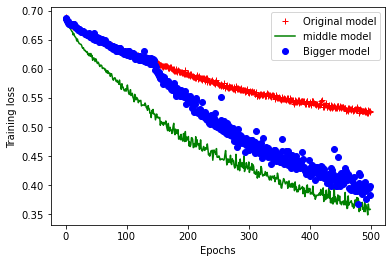

In [46]:
plt.plot(epochs, original_train_loss, 'b+', c="red", label='Original model')
plt.plot(epochs, small_train_loss, 'b-', c="green",label='middle model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## validation loss

In [47]:
original_val_loss = original_history.history['val_loss']
small_val_loss = smaller_history.history['val_loss']
bigger_val_loss = bigger_history.history['val_loss']

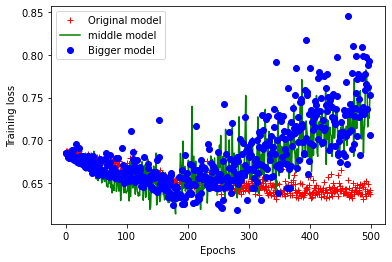

In [48]:
plt.plot(epochs, original_val_loss, 'b+', c="red", label='Original model')
plt.plot(epochs, small_val_loss, 'b-', c="green",label='middle model')
plt.plot(epochs, bigger_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## accuracy

In [49]:
original_train_acc = original_history.history['accuracy']
small_train_acc = smaller_history.history['accuracy']
bigger_model_train_acc = bigger_history.history['accuracy']

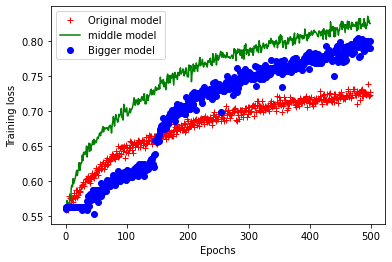

In [50]:
plt.plot(epochs, original_train_acc, 'b+', c="red", label='Original model')
plt.plot(epochs, small_train_acc, 'b-', c="green",label='middle model')
plt.plot(epochs, bigger_model_train_acc, 'bo', label='Bigger model')

plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [51]:
original_val_acc = original_history.history['val_accuracy']
small_val_acc = smaller_history.history['val_accuracy']
bigger_val_acc = bigger_history.history['val_accuracy']

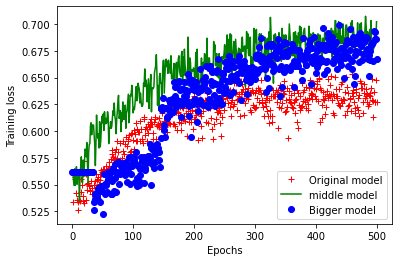

In [52]:
plt.plot(epochs, original_val_acc, 'b+', c="red", label='Original model')
plt.plot(epochs, small_val_acc, 'b-', c="green",label='middle model')
plt.plot(epochs,bigger_val_acc, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()